# Mithul
## bl.en.u4aie21034

Original Audio:


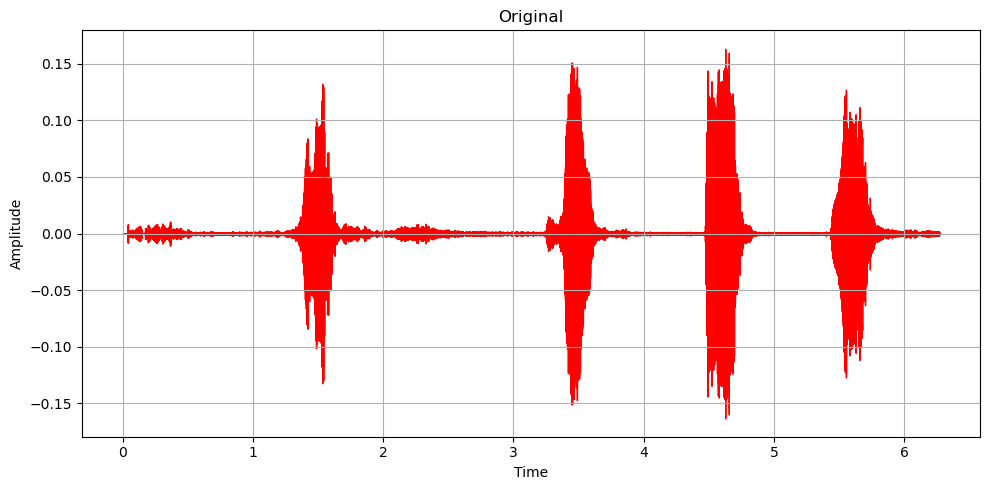

Trimmed Audio:


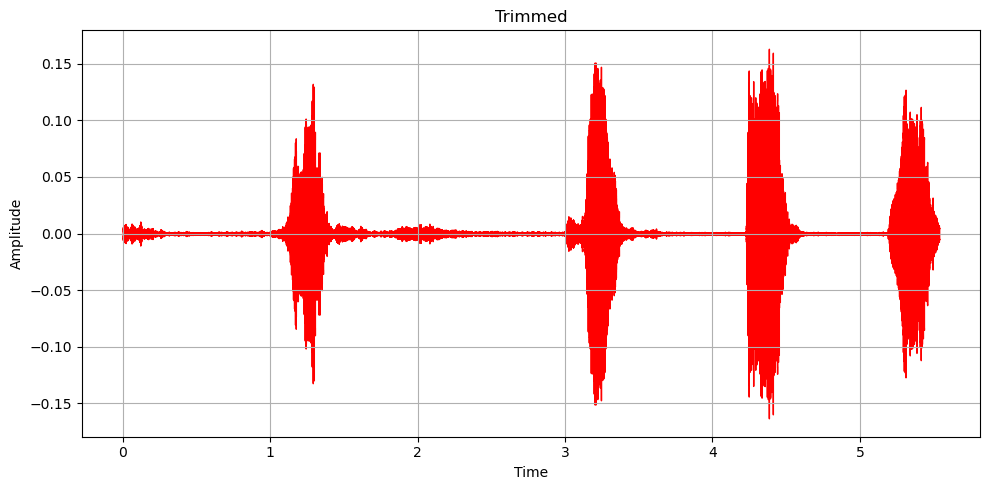

In [34]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
original_audio, sr = librosa.load('speech1.mp3', sr=None)
trimmed_audio, index = librosa.effects.trim(original_audio, top_db=25)
trimmed_audio, index = librosa.effects.trim(trimmed_audio[::-1], top_db=25)
trimmed_audio = trimmed_audio[::-1]
sf.write('trimmed_audio.wav', trimmed_audio, sr)
trimmed, sr1 = librosa.load('trimmed_audio.wav', sr=None)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))
plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr, color='red')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))
plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1, color='red')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


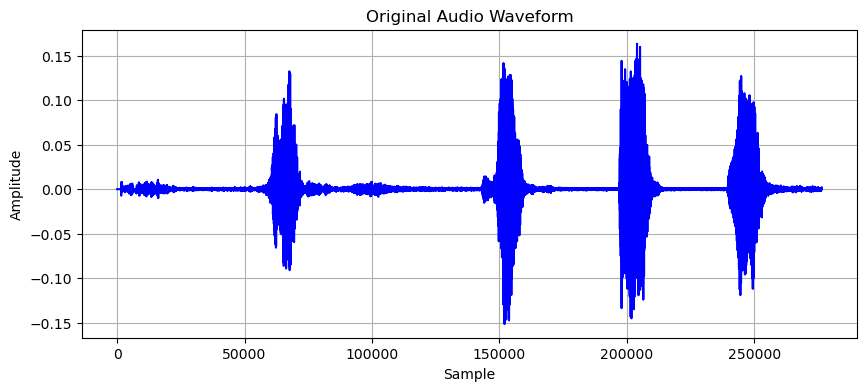

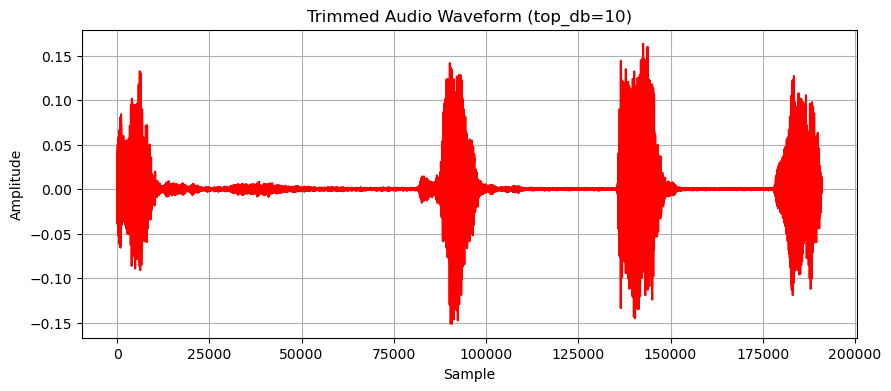

Trimmed Audio (top_db=10):


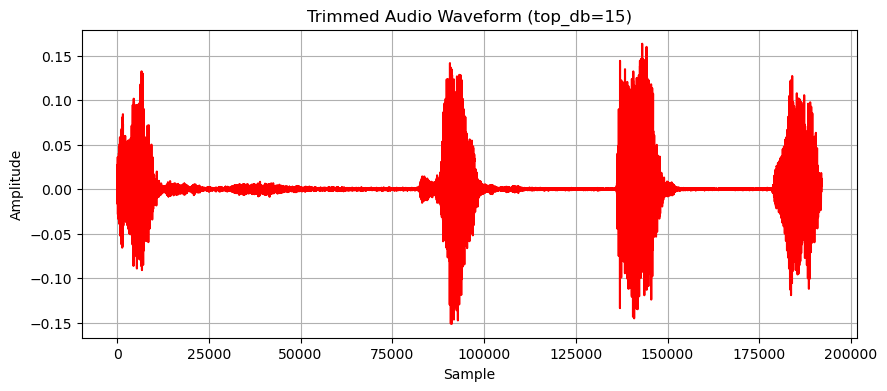

Trimmed Audio (top_db=15):


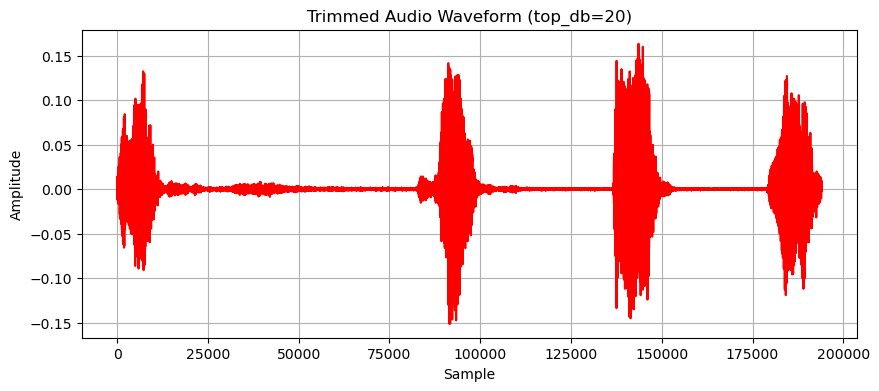

Trimmed Audio (top_db=20):


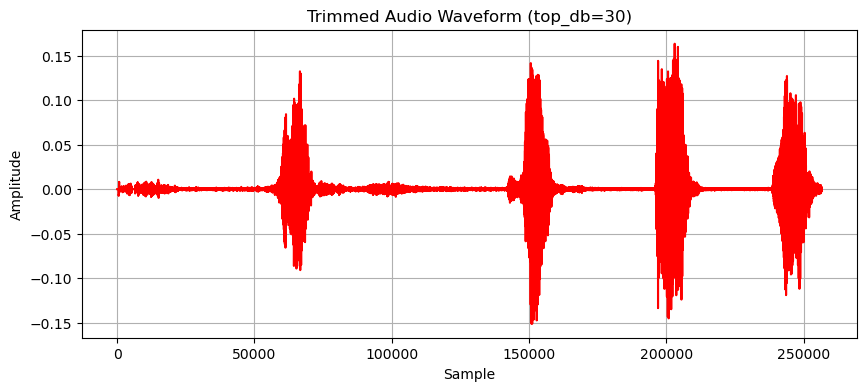

Trimmed Audio (top_db=30):


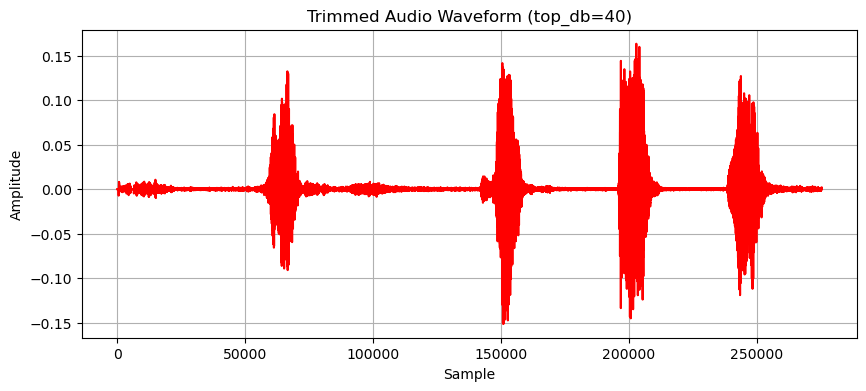

Trimmed Audio (top_db=40):


In [35]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
original_audio, sr = librosa.load('speech1.mp3', sr=None)
plt.figure(figsize=(10, 4))
plt.plot(original_audio, color='b')
plt.title('Original Audio Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
for top_db in [10, 15, 20, 30, 40]:
    trimmed_audio, index = librosa.effects.trim(original_audio, top_db=top_db)
    plt.figure(figsize=(10, 4))
    plt.plot(trimmed_audio, color='r')
    plt.title(f'Trimmed Audio Waveform (top_db={top_db})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    sf.write(f'trimmed_audio_top_db_{top_db}.wav', trimmed_audio, sr)
    print(f"Trimmed Audio (top_db={top_db}):")
    ipd.display(ipd.Audio(trimmed_audio, rate=sr))

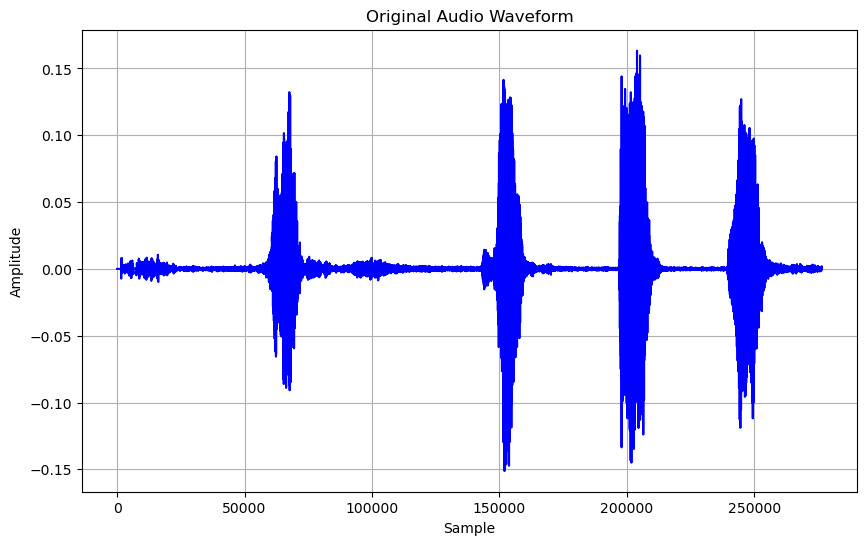

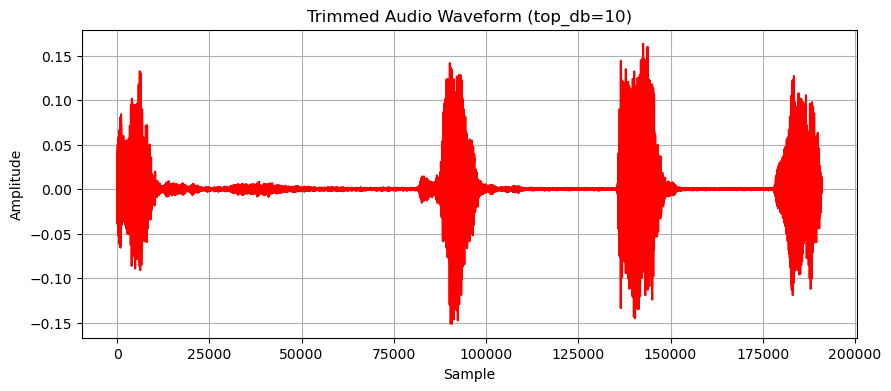

Trimmed Audio (top_db=10):
SNR: -1.6270670294761658 dB
Standard Deviation (SD): 0.018830908


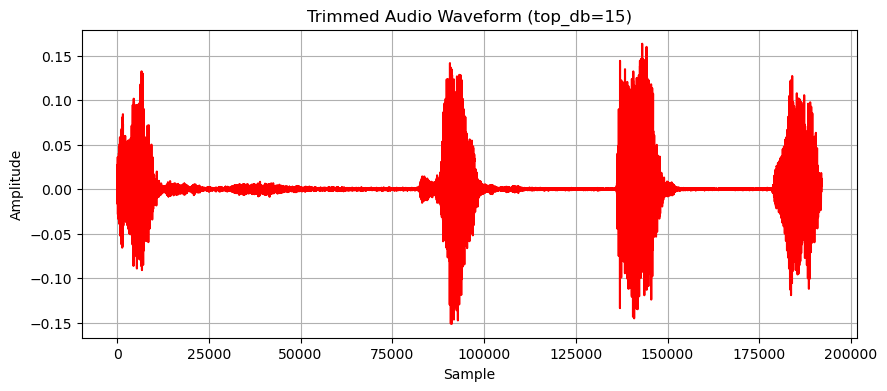

Trimmed Audio (top_db=15):
SNR: -1.6274906694889069 dB
Standard Deviation (SD): 0.01880396


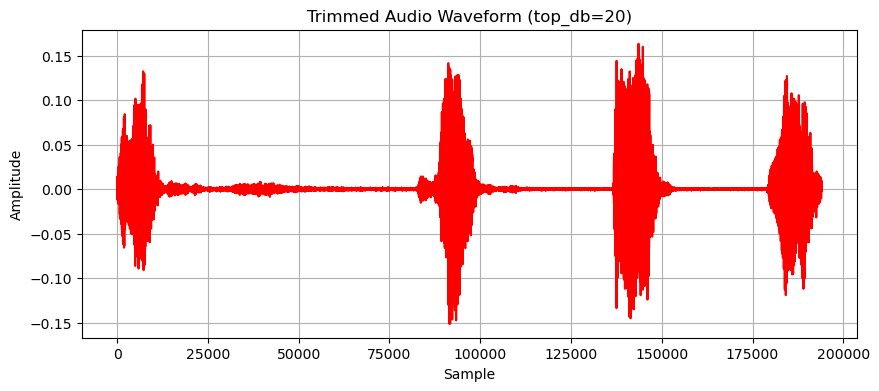

Trimmed Audio (top_db=20):
SNR: -1.5831424295902252 dB
Standard Deviation (SD): 0.018728025


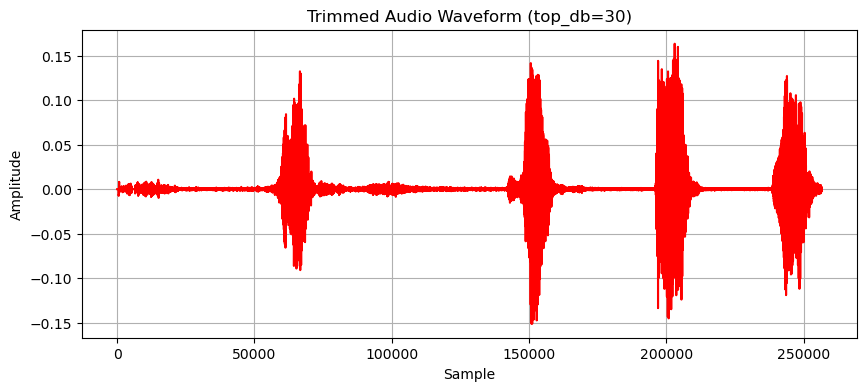

Trimmed Audio (top_db=30):
SNR: -3.46172034740448 dB
Standard Deviation (SD): 0.016319795


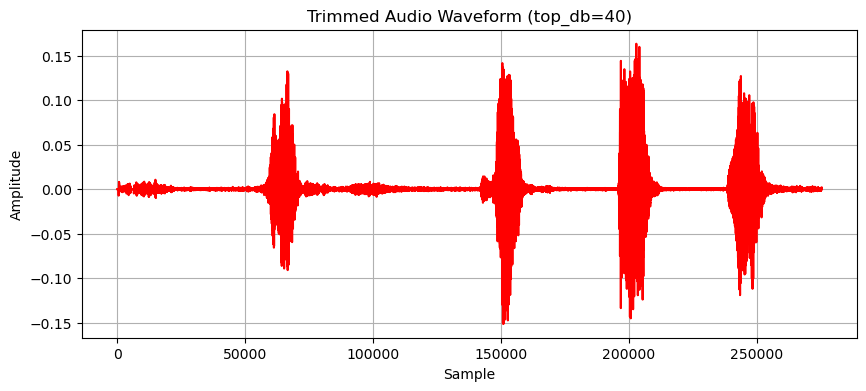

Trimmed Audio (top_db=40):
SNR: -3.461853563785553 dB
Standard Deviation (SD): 0.015751



Results Summary:
+-------------+------------+-----------+
| Threshold   |   SNR (dB) |        SD |
+=============+============+===========+
| top_db=10   |   -1.62707 | 0.0188309 |
+-------------+------------+-----------+
| top_db=15   |   -1.62749 | 0.018804  |
+-------------+------------+-----------+
| top_db=20   |   -1.58314 | 0.018728  |
+-------------+------------+-----------+
| top_db=30   |   -3.46172 | 0.0163198 |
+-------------+------------+-----------+
| top_db=40   |   -3.46185 | 0.015751  |
+-------------+------------+-----------+


In [47]:
#A3
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

def calculate_snr(signal, noise):
    return 10 * np.log10(np.sum(signal ** 2) / np.sum(noise ** 2))

def calculate_sd(data):
    return np.std(data)

original_audio, sr = librosa.load('speech1.mp3', sr=None)
plt.figure(figsize=(10, 6))  
plt.plot(original_audio, color='b')
plt.title('Original Audio Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

results = []  

for top_db in [10, 15, 20, 30, 40]:
    trimmed_audio, index = librosa.effects.trim(original_audio, top_db=top_db)

    original_audio_resized = original_audio[:len(trimmed_audio)]

    noise = original_audio_resized - trimmed_audio
    snr = calculate_snr(trimmed_audio, noise)
    sd = calculate_sd(trimmed_audio)
    
    results.append([f"top_db={top_db}", snr, sd]) 
    plt.figure(figsize=(10, 4))
    plt.plot(trimmed_audio, color='r')
    plt.title(f'Trimmed Audio Waveform (top_db={top_db})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    sf.write(f'trimmed_audio_top_db_{top_db}.wav', trimmed_audio, sr)
    print(f"Trimmed Audio (top_db={top_db}):")
    print("SNR:", snr, "dB")
    print("Standard Deviation (SD):", sd)
    ipd.display(ipd.Audio(trimmed_audio, rate=sr))

print("\nResults Summary:")
print(tabulate(results, headers=["Threshold", "SNR (dB)", "SD"], tablefmt="grid"))
